In [ ]:
# @title Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
# @title Data set
df = pd.read_csv('Unemployment in India.csv')
df.columns
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [ ]:
# @title Data input
# renaming columns
df.rename(columns={'Region':'State'}, inplace=True)
df.rename(columns={' Frequency':'Frequency',' Estimated Unemployment Rate (%)':'Estimated Unemployment Rate (%)',' Estimated Employed':'Estimated Employed',' Estimated Labour Participation Rate (%)':'Estimated Labour Participation Rate (%)','Region.1':'Region'},inplace=True)
df.columns

Index(['State', ' Date', 'Frequency', 'Estimated Unemployment Rate (%)',
       'Estimated Employed', 'Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

In [ ]:
avg_unemployment_rate=df.groupby('State')['Estimated Unemployment Rate (%)'].mean()
state_with_highest_unemployment=avg_unemployment_rate.idxmax()
high_unemployment_rate=avg_unemployment_rate.max()
state_with_lowest_unemployment=avg_unemployment_rate.idxmin()
low_unemploy_rate=avg_unemployment_rate.min()
print(f"state  with  high employment : {state_with_highest_unemployment}")
print(f"high employment rate : {high_unemployment_rate}")
print(f"state  with  low employment : {state_with_lowest_unemployment}")
print(f"low employment rate : {low_unemploy_rate}")

state  with  high employment : Tripura
high employment rate : 28.350357142857142
state  with  low employment : Meghalaya
low employment rate : 4.7988888888888885


In [ ]:
avg_unemployment_rate

,Estimated Unemployment Rate (%)
State,
Andhra Pradesh,7.477143
Assam,6.428077
Bihar,18.918214
Chandigarh,15.991667
Chhattisgarh,9.240357
Delhi,16.495357
Goa,9.274167
Gujarat,6.663929
Haryana,26.283214


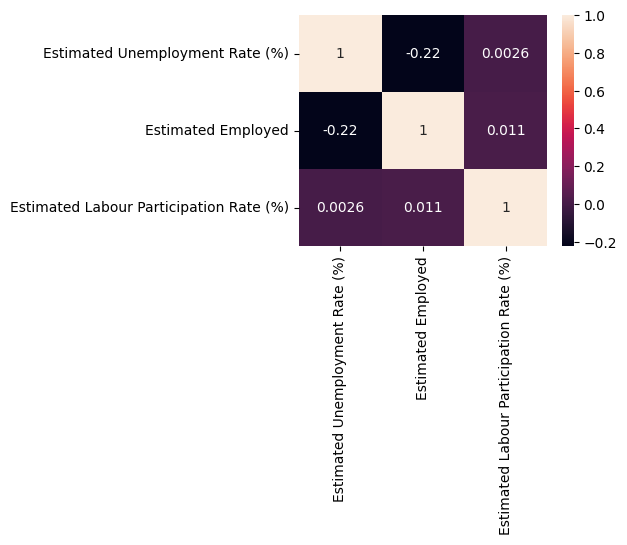

In [ ]:
# @title Visualization
# correlation plot between features
plt.figure(figsize=(4,3))
numerical_df = df.select_dtypes(include=np.number)
sns.heatmap(numerical_df.corr(), annot=True)
plt.show()

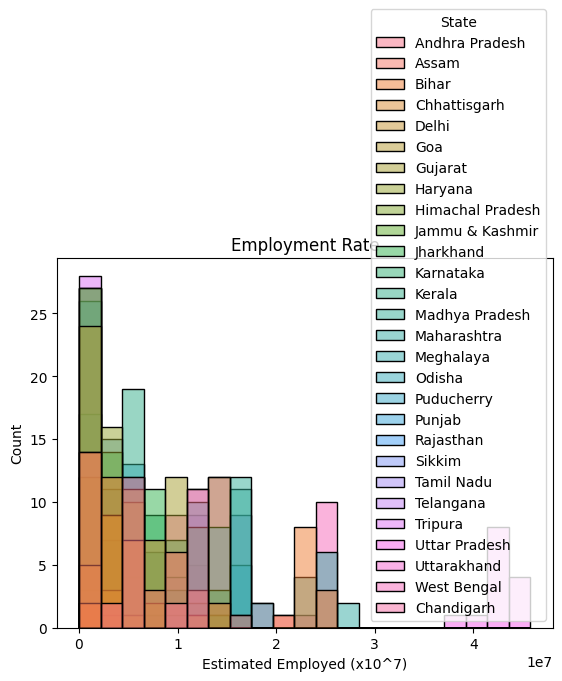

In [ ]:
# @title Region-wise employment
plt.title('Employment Rate')
sns.histplot(x='Estimated Employed', hue='State', data=df)
plt.xlabel('Estimated Employed (x10^7)')
plt.ylabel('Count')
plt.show()

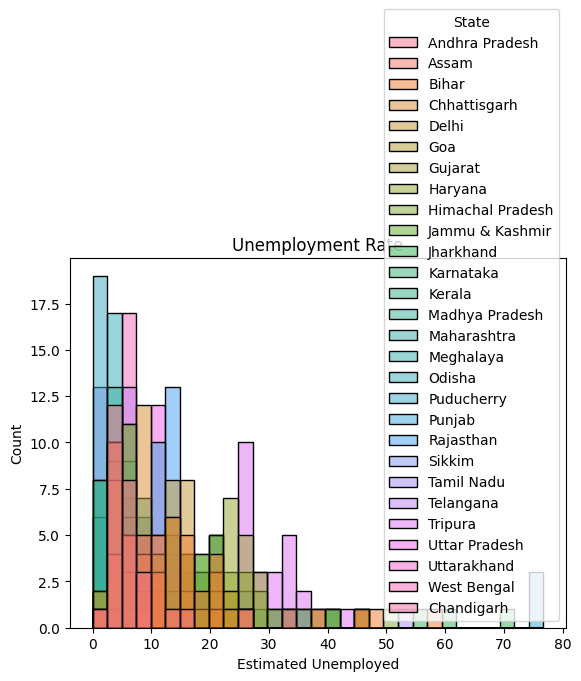

In [ ]:
# @title Region-wise unemployment
plt.title('Unemployment Rate')
sns.histplot(x='Estimated Unemployment Rate (%)', hue='State', data=df)
plt.xlabel('Estimated Unemployed')
plt.ylabel('Count')
plt.show()

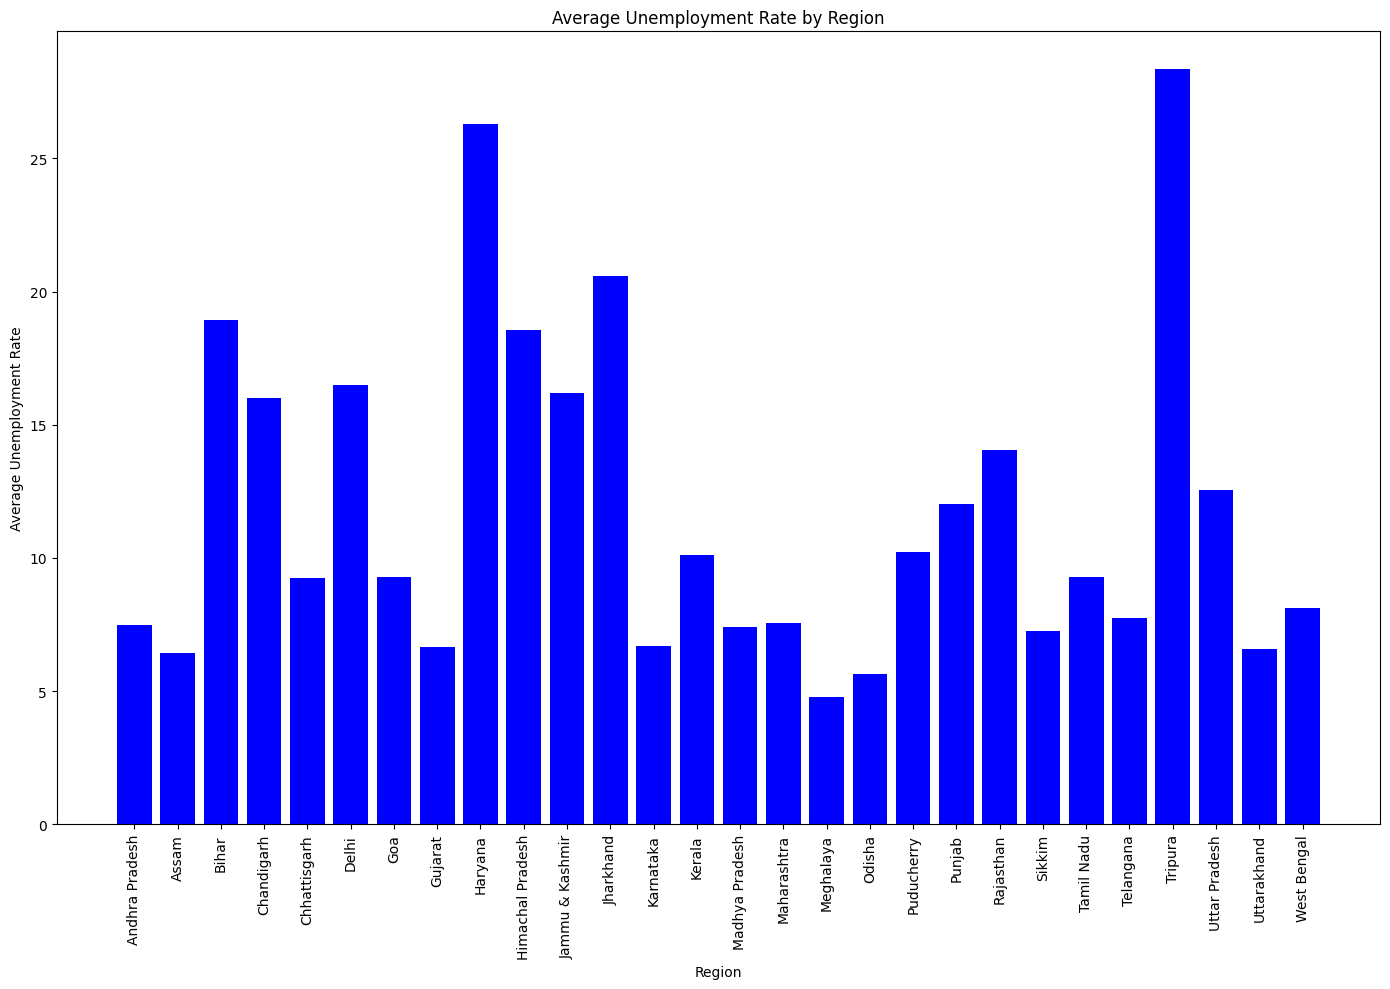

In [ ]:
# @title Average Unemployement Rate by Region
regions = avg_unemployment_rate.index
avg_rates = avg_unemployment_rate.values
plt.figure(figsize=(14, 10))
plt.bar(regions, avg_rates, color='blue')
plt.xlabel('Region')
plt.ylabel('Average Unemployment Rate')
plt.title('Average Unemployment Rate by Region')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

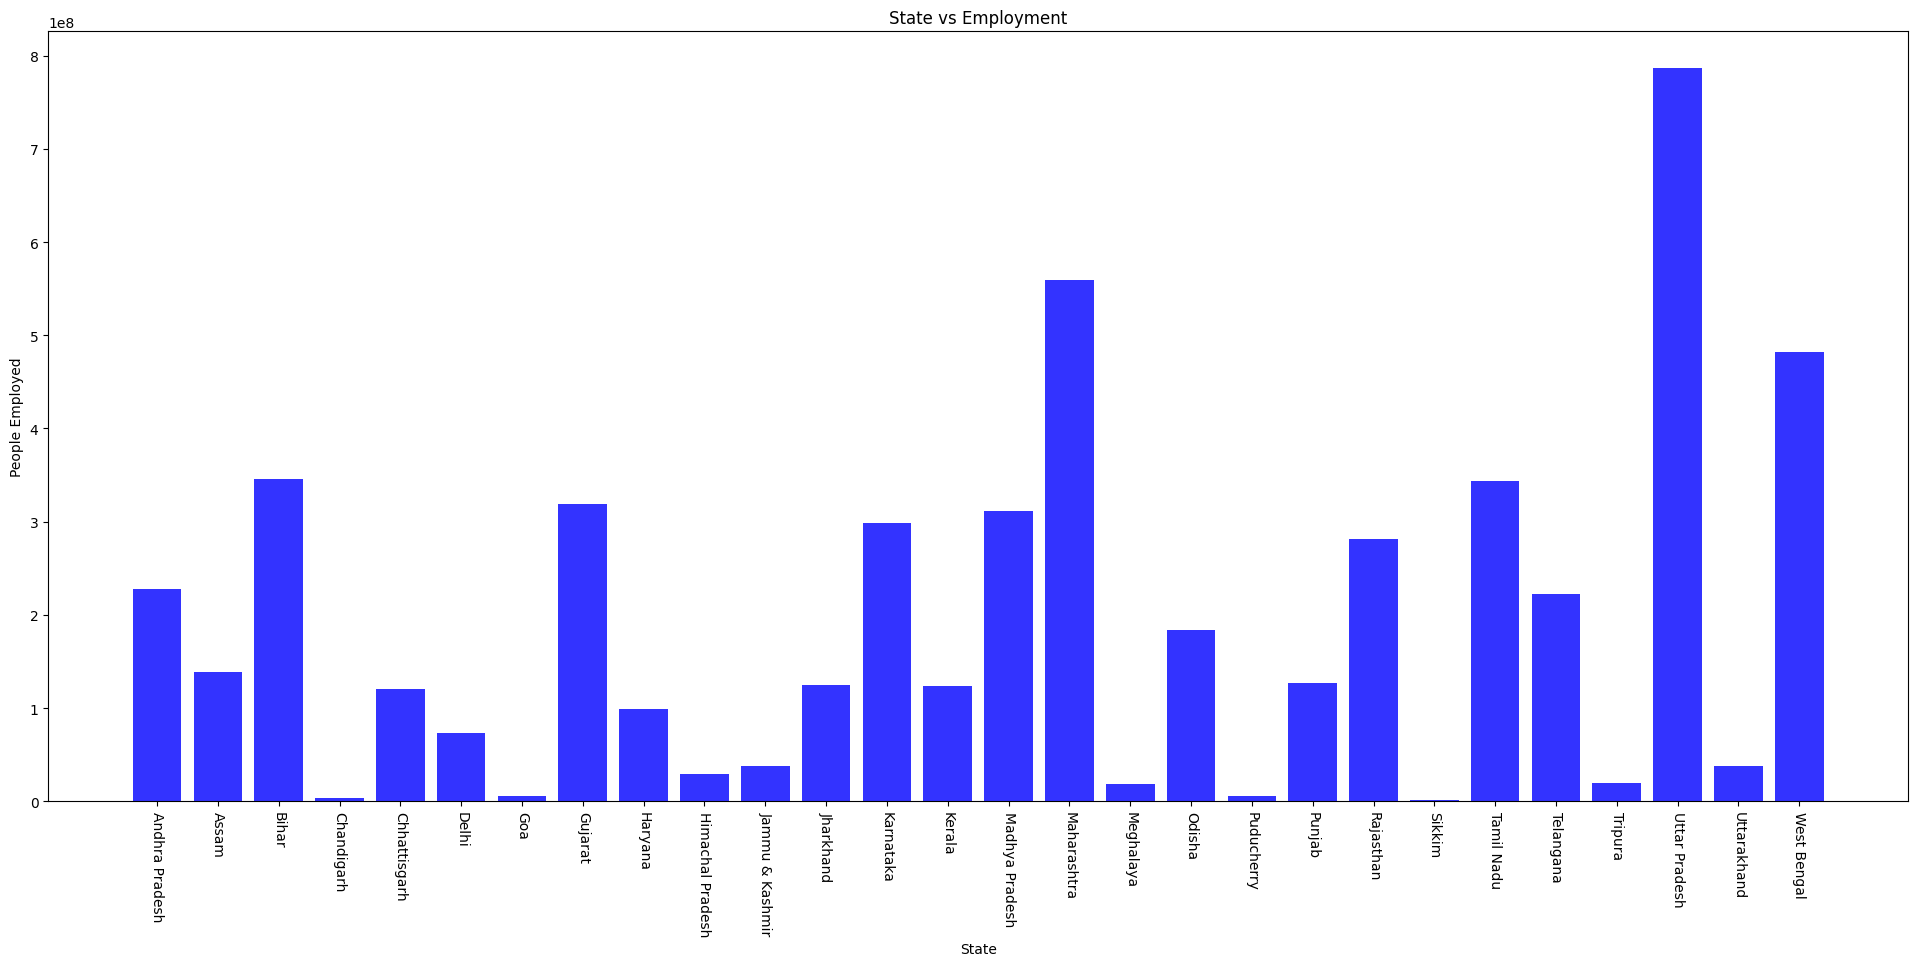

In [ ]:
# @title State vs Employment
fig, ax = plt.subplots(figsize=(24,10))
grouped_data = df.groupby('State')['Estimated Employed'].sum().reset_index()

plt.bar(grouped_data['State'], grouped_data['Estimated Employed'], color='blue', alpha=0.8)
plt.xlabel('State')
plt.xticks(rotation=270)
plt.ylabel('People Employed')
plt.title('State vs Employment')
plt.show()

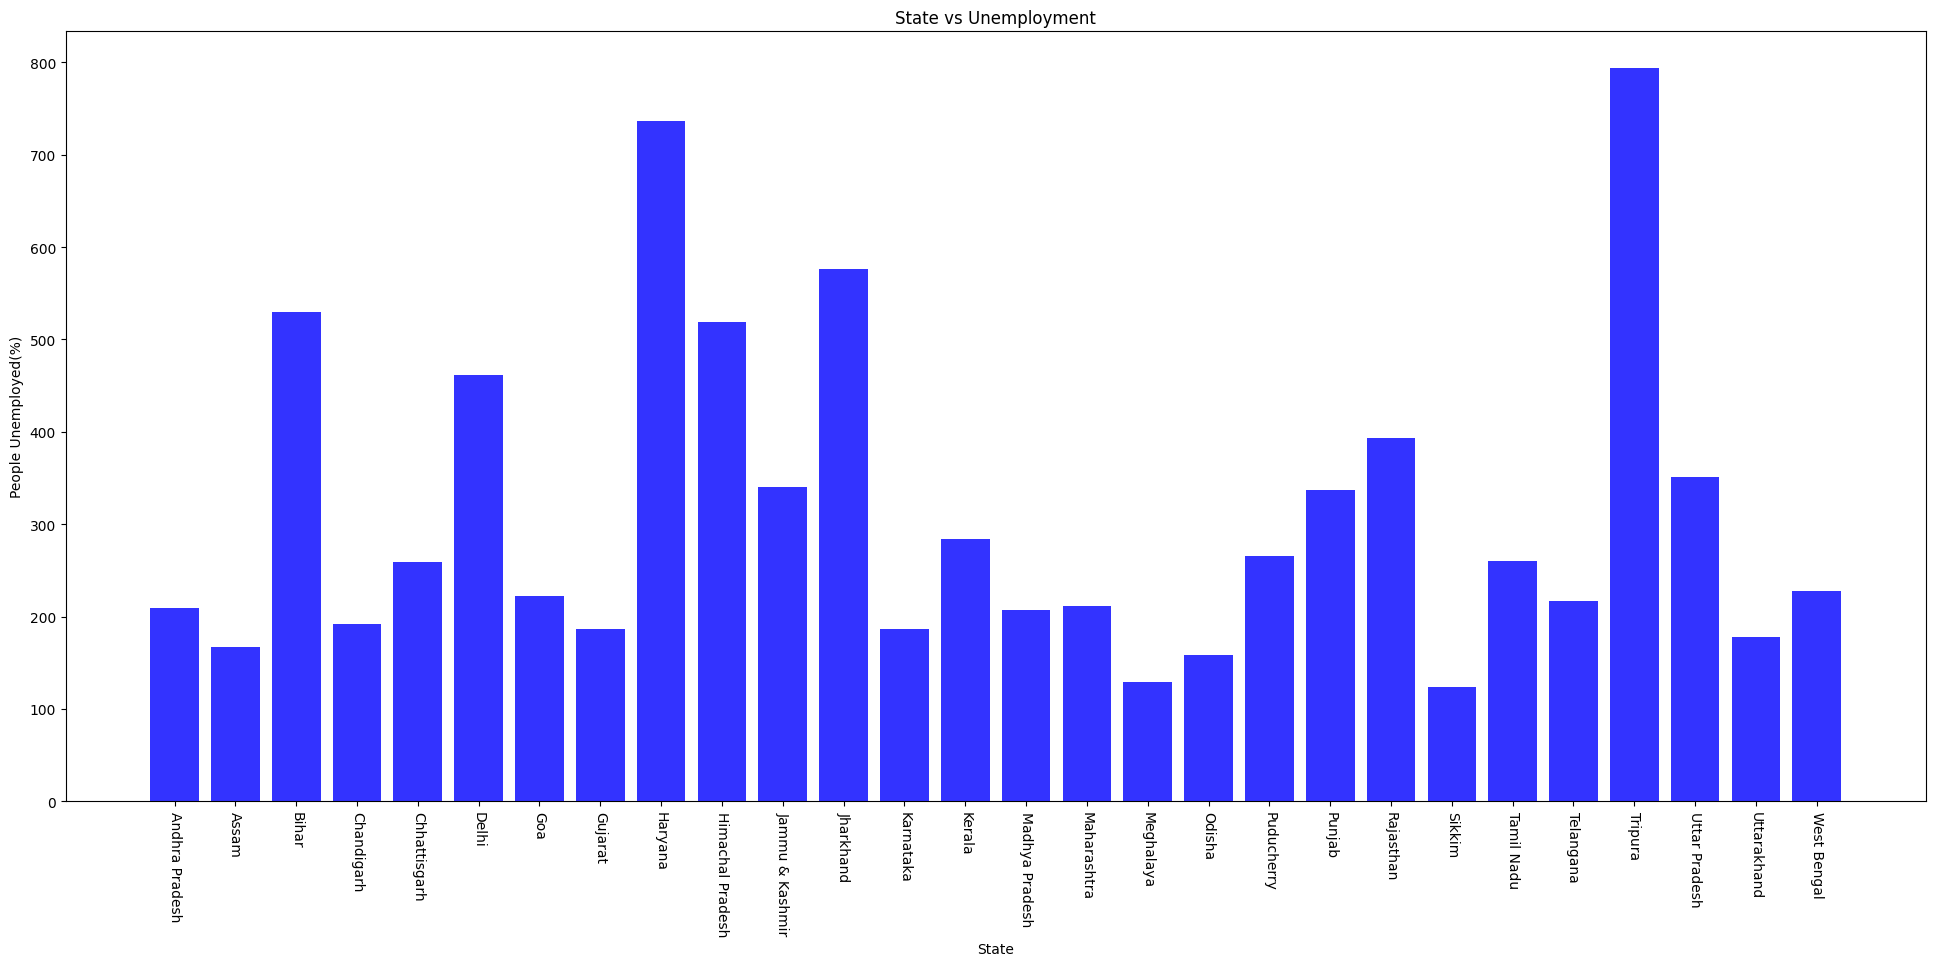

In [ ]:
# @title Region-wise unemployment
fig, ax = plt.subplots(figsize=(24,10))
grouped_data = df.groupby('State')['Estimated Unemployment Rate (%)'].sum().reset_index()

plt.bar(grouped_data['State'], grouped_data['Estimated Unemployment Rate (%)'], color='blue', alpha=0.8)
plt.xlabel('State')
plt.xticks(rotation=270)
plt.ylabel('People Unemployed(%)')
plt.title('State vs Unemployment')
plt.show()

<ipython-input-15-dc541a5a2ed9>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='State', y='Estimated Labour Participation Rate (%)', data=df,palette="hsv")


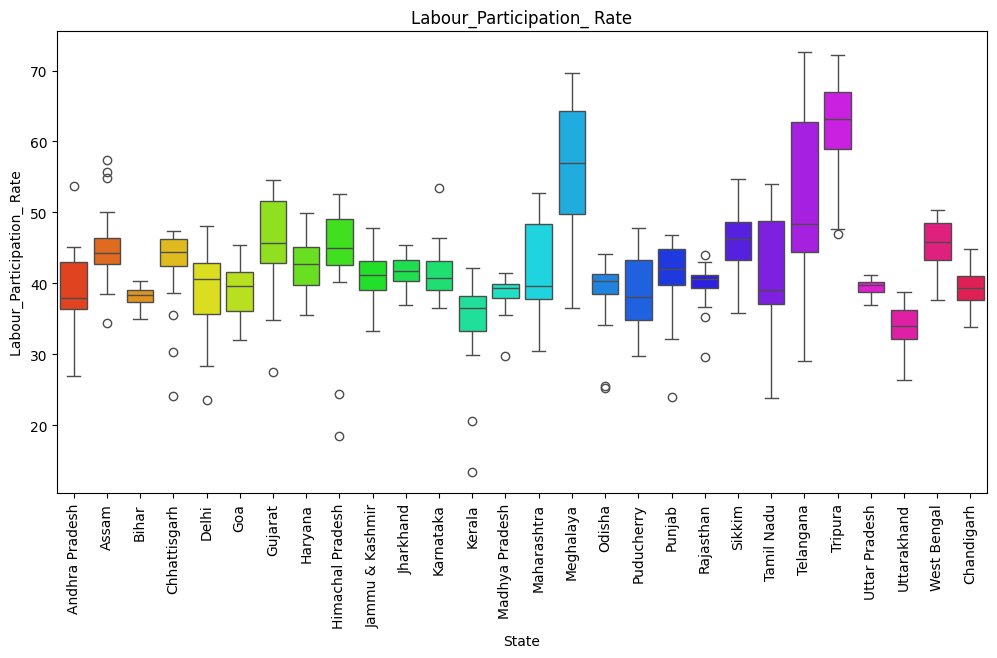

In [ ]:
# @title Labour Participation Rate
plt.figure(figsize=(12, 6))
sns.boxplot(x='State', y='Estimated Labour Participation Rate (%)', data=df,palette="hsv")
plt.title("Labour_Participation_ Rate")
plt.xlabel("State")
plt.ylabel("Labour_Participation_ Rate")
plt.xticks(rotation=90)
plt.show()

<ipython-input-16-5c2a67e2eda6>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='State', y='Estimated Employed', data=df,palette="brg")


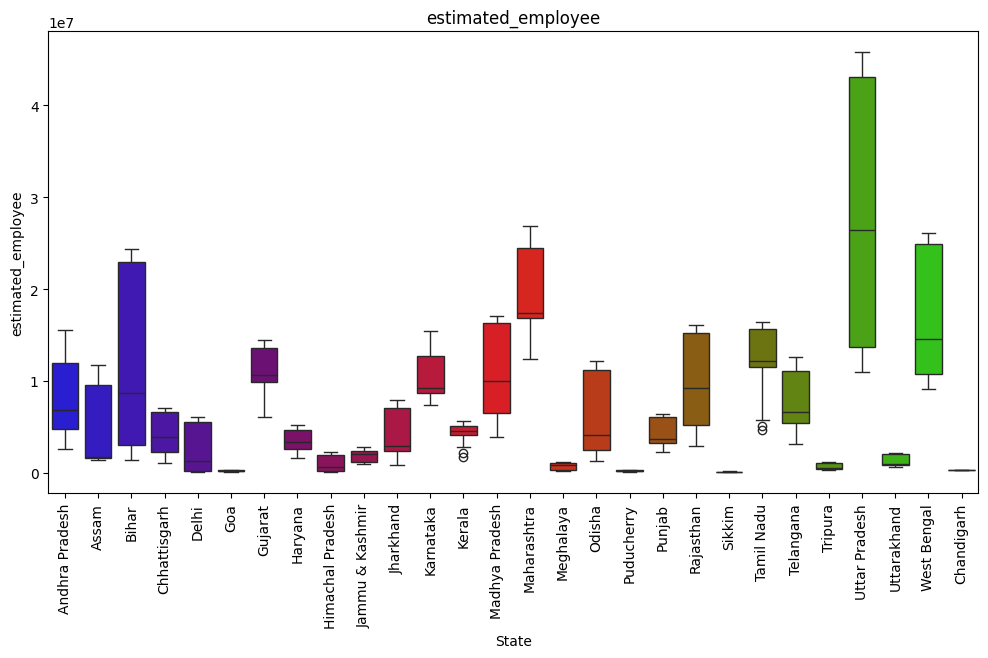

In [ ]:
# @title Estimated Employed
plt.figure(figsize=(12, 6))
sns.boxplot(x='State', y='Estimated Employed', data=df,palette="brg")
plt.title("estimated_employee")
plt.xlabel("State")
plt.ylabel("estimated_employee")
plt.xticks(rotation=90)
plt.show()

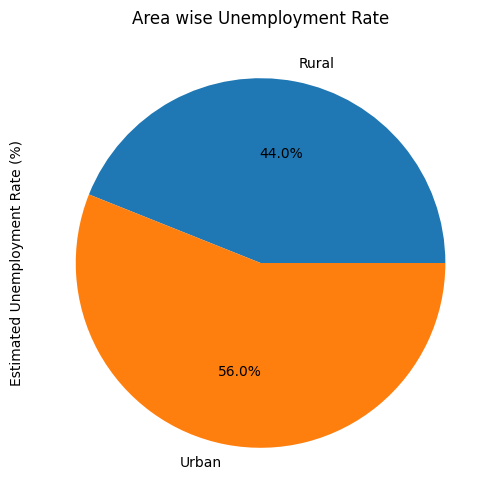

In [ ]:
# @title Area wise Unemployment Rate
# area wise unemployment rate using pie chart
plt.figure(figsize=(8,6))
df.groupby('Area')['Estimated Unemployment Rate (%)'].mean().plot(kind='pie', autopct='%1.1f%%')
plt.title('Area wise Unemployment Rate')
plt.show()

In [ ]:
# @title Summary of findings
avg_unemployement_over_time = df.groupby(' Date')['Estimated Unemployment Rate (%)'].mean().sort_values(ascending=False).reset_index()
avg_unemployement_over_region = df.groupby('State')['Estimated Unemployment Rate (%)'].mean().sort_values(ascending=False).reset_index()
avg_people_employed_over_region = df.groupby('State')['Estimated Employed'].mean().sort_values(ascending=False).reset_index()
avg_labour_part_rate_over_region = df.groupby('State')['Estimated Labour Participation Rate (%)'].mean().sort_values(ascending=False).reset_index()
avg_unemployement_area_wise = df.groupby('Area')['Estimated Unemployment Rate (%)'].mean().sort_values(ascending=False).reset_index()
highest_unemployement_rate_month = df.groupby(' Date')['Estimated Unemployment Rate (%)'].max().sort_values(ascending=False).reset_index()

# print all the dataframes
print("Average Unemployment Rate over time\n", avg_unemployement_over_time)
print("\nAverage Unemployment Rate over Region\n", avg_unemployement_over_region)
print("\nAverage People employed over Region\n", avg_people_employed_over_region)
print("\nAverage Labour Participation Rate over Region\n", avg_labour_part_rate_over_region)
print("\nAverage Unemployment Rate over Area\n", avg_unemployement_area_wise)
print("\nHighest Unemployment Rate Month wise\n", highest_unemployement_rate_month)

Average Unemployment Rate over time
            Date  Estimated Unemployment Rate (%)
0    31-05-2020                        24.875294
1    30-04-2020                        23.641569
2    30-06-2020                        11.903600
3    31-03-2020                        10.700577
4    29-02-2020                         9.964717
5    31-01-2020                         9.950755
6    31-10-2019                         9.900909
7    30-11-2019                         9.868364
8    31-08-2019                         9.637925
9    31-12-2019                         9.497358
10   30-06-2019                         9.303333
11   30-09-2019                         9.051731
12   31-07-2019                         9.033889
13   31-05-2019                         8.874259

Average Unemployment Rate over Region
                State  Estimated Unemployment Rate (%)
0            Tripura                        28.350357
1            Haryana                        26.283214
2          Jharkhand      